Lab Objective: Many real world data sets—stock market measurements, ocean tide levels, website
traffic, seismograph data, audio signals, fluid simulations, quarterly dividends, and so on—are time
series, meaning they come with time-based labels. There is no universal format for such labels, and
indexing by time is often difficult with raw data. Fortunately, pandas has tools for cleaning and
analyzing time series. In this lab we use pandas to clean and manipulate time-stamped data and
introduce some basic tools for time series analysis.

# Q1 and Q2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

df = pd.read_csv('DJIA.csv', index_col=0)

Text(0.5, 1.0, 'Dow Jones over time')

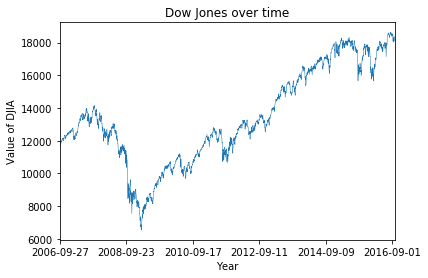

In [2]:
#drop nan
df = df.dropna(axis=0)
# Drop any values with dots
df = df.drop(df[df['VALUE']=='.'].index)
# cast to float
df = pd.to_numeric(df['VALUE'])

df.plot(y='VALUE',lw=.5)
plt.ylabel("Value of DJIA")
plt.xlabel('Year')
plt.title('Dow Jones over time')

In [3]:
paychecks = pd.read_csv('paychecks.csv', header=None)

Text(0, 0.5, 'Wage')

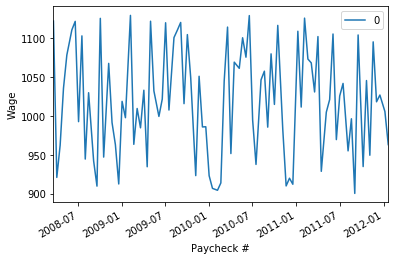

In [4]:
idx1 = pd.date_range(start='13/03/2008', periods=93, freq="WOM-1FRI" )
idx2 = pd.date_range(start='13/03/2008', periods=93, freq="WOM-3FRI" )

date_idx = pd.DatetimeIndex.union(idx1,idx2)[0:93]

paychecks = paychecks.set_index(date_idx)

paychecks.plot()
plt.xlabel('Paycheck #')
plt.ylabel('Wage')

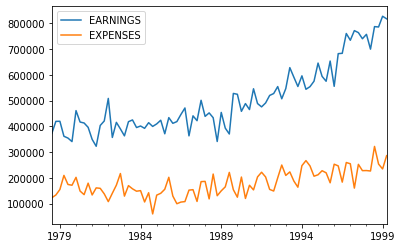

In [5]:
finances = pd.read_csv('finances.csv')

periodidx = pd.period_range(start="1978-09", periods=len(finances.index), freq="Q-DEC")
finances = finances.set_index(periodidx)

finances.plot()

# Question 4

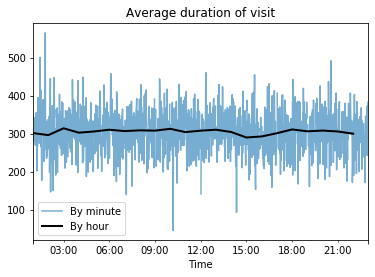

In [6]:
websites = pd.read_csv('website_traffic.csv', parse_dates=['ENTER', 'LEAVE'], index_col=1)

websites['DURATION'] = (websites.LEAVE - websites.index).dt.seconds
fig, ax = plt.subplots()

websites.resample('1min').mean().plot(legend=False, ax=ax, alpha=0.6)
websites.resample('H').mean().plot(legend=False, ax=ax, lw=2, c='k')
plt.legend(['By minute', 'By hour'])
plt.title('Average duration of visit')
plt.xlabel('Time')
plt.show()

# Question 5

In [7]:
djia = pd.read_csv('DJIA.csv', index_col=0)

#drop nan
djia = djia.dropna(axis=0)
# Drop any values with dots
djia = djia.drop(djia[djia['VALUE']=='.'].index)

In [8]:
day_diff = (pd.to_numeric(djia['VALUE']) - pd.to_numeric(djia.shift(1)['VALUE'])).dropna()

print('Biggest gain')
print(day_diff.sort_values()[-1:])

print('\nBiggest Loss')
print(day_diff.sort_values()[0:1])

Biggest gain
DATE
2008-10-13    936.42
Name: VALUE, dtype: float64

Biggest Loss
DATE
2008-09-29   -777.68
Name: VALUE, dtype: float64


In [9]:
djia = djia.set_index(pd.to_datetime(djia.index))

djia_month = djia.resample('M').first()

m_diff = (pd.to_numeric(djia_month['VALUE']) - pd.to_numeric(djia_month.shift(1)['VALUE'])).dropna()

print('Month Biggest Gain')
print(m_diff.sort_values()[-1:])
print('\nMonth Biggest Loss')
print(m_diff.sort_values()[0:1])

Month Biggest Gain
DATE
2015-11-30    1556.75
Name: VALUE, dtype: float64

Month Biggest Loss
DATE
2015-09-30   -1539.85
Name: VALUE, dtype: float64


# Question 6

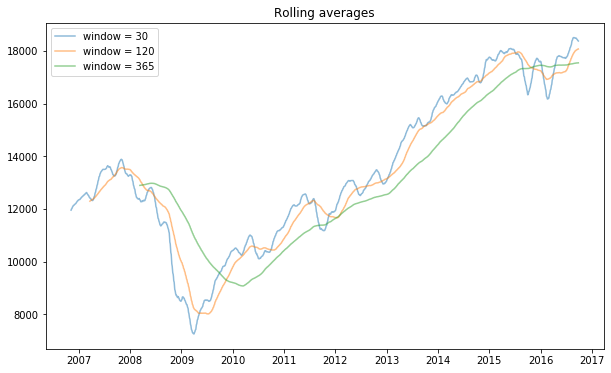

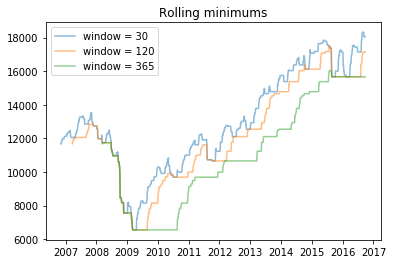

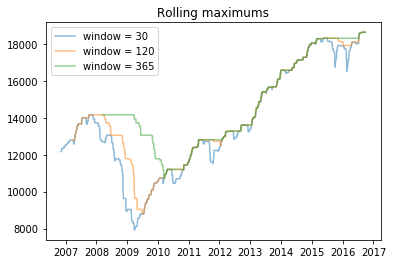

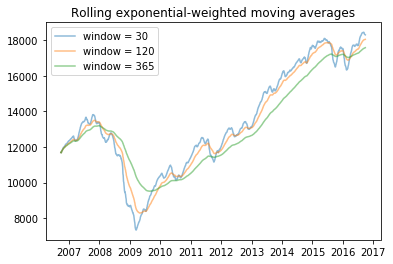

In [10]:
windows  =  [30, 120,365]

plt.figure(figsize=(10, 6))

for w in windows:
    plt.plot(djia.rolling(window=w).mean(), alpha=0.5, label=f'window = {w}')
plt.title('Rolling averages')
plt.legend()
plt.show()

for w in windows:
    plt.plot(djia.rolling(window=w).min(), alpha=0.5, label=f'window = {w}')
plt.title('Rolling minimums')
plt.legend()
plt.show()

for w in windows:
    plt.plot(djia.rolling(window=w).max(), alpha=0.5, label=f'window = {w}')
plt.title('Rolling maximums')
plt.legend()
plt.show()

for w in windows:
    plt.plot(djia.ewm(span=w).mean(), alpha=0.5, label=f'window = {w}')
plt.title('Rolling exponential-weighted moving averages')
plt.legend()
plt.show()